<a href="https://colab.research.google.com/github/thereayoo/DAFE_Python_course_homeworks_2019_2020/blob/master/thermal_conductivity_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Теплопроводность и диффузия

* [Теплопроводность](#Теплопроводность)
* [Метод конечных элементов](#Метод-конечных-элементов-(МКЭ))
* [Метод конечных объёмов](#Метод-конечных-объемов-(МКО))
* [Уравнение Эйлера](#Уравнение-Эйлера)
* [Закон Фика](#Закон-Фика)

### Теплопроводность

#### Введение

**Уравнения в частных производных** в отличие от обыкновенных дифференциальных уравнений **содержат более одной независимой переменной**.

Такими переменными могут быть, например, одновременно ***пространственные координаты и время*** или ***только пространственные координаты для статической задачи***.

***В уравнениях производные от функций по любой из независимых переменных являются частными. Также уравнения могут содержать смешанные производные.***

Уравнение в частных производных может быть представлено в виде:

$$F(x, y, ..., u, u_x, u_y,...,u_{xx}, u_{yy}, ...)=0,$$

где $x, y,…$ – независимые переменные; $u=u(x, y,…)$ – искомая функция; $u_x=\frac{du}{dx},\ \ u_y=\frac{du}{dy},\ \ u_{xx}=\frac{d^2 u}{dx^2},\ \ u_{xy}=\frac{d^2 u}{dxdy},...$

Далее будем понимать, что все фигурирующие функции по умолчанию являются непрерывными и имеющими непрерывные производные соответствующих порядков.

Любое дифференциальное уравнение в частных производных имеет ***бесконечное множество решений***. На практике наибольший интерес представляют решения, удовлетворяющие дополнительным условиям. Как правило, задачи, описывающие физические или химические процессы в рамках дифференциальных уравнений в частных производных, включают в себя краевые условия. Принято различать ***начальные*** и ***граничные условия***.

***Граничные условия*** – характеризуют поведение решения задачи на некоторой граничной линии (поверхности) или в ее окрестности.

***Начальные условия*** – представляют собой краевые условия во времени, которые, например, характеризуют распределение искомой функции в начальный момент времени.

#### Дифференциальное уравнение теплопроводности в частных производных

На примере задачи кондуктивной теплопередачи в твердом теле рассмотрим вывод дифференциального уравнения теплопроводности в частных производных.

Пусть дан стержень (или любое другое тело, в котором теплопередача по одной из координат является определяющей для исследуемого процесса, теплопередачей же по двум другим координатам можно пренебречь) длиной ***l***. Границы стержня имеют координаты ***x=0***, ***x=l***. Обозначим через ***S*** площадь сечения стержня с плоскости, перпендикулярной оси ***x***. Будем полагать ***S*** настолько малой, что все точки одного сечения имеют идентичную температуру. Обозначим ***T=T(x, t)*** температуру точек в сечении стержня с координатой ***x*** в момент времени ***t***. Будем считать, что стержень теплоизолирован вдоль боковой поверхности, а внутри стержня нет источников или стоков тепла. Рассмотрим элементы стержня между двумя соседними сечениями с координатами ***x*** и ***x+dx*** ***(рис. 1)***.

<img src='images/straight_elem.jpg'/>

**Рис. 1. Элемент стержня**

Найдем количество тепла *dQ*, которое аккумулируется выделенным элементом за время *dt*. Согласно закону Фурье интенсивность *q(x, t)* теплового потока в сечении *x*:

$$q(x, t)=-\lambda(x)\frac{\partial T(x, t)}{\partial x}$$

где $\lambda(x)$ – коэффициент теплопроводности, *Вт/(м·К)*.

В этом выражении знак минус означает, что тепло распространяется из области с большей температурой в область с меньшей температурой, т.к. градиент температуры $\frac{∂T}{∂x}$ характеризует направление роста температуры.

Через левое сечение к элементу стержня (рис. 1) за время *dt* будет подведено количество тепла:

$$dQ_1=-\lambda(x)S\frac{\partial T(x, t)}{\partial x}dt$$

Через правое сечение от выделенного элемента стержня вовне за время *dt* отводится количество тепла:

$$dQ_2=-\lambda(x+dx)S\frac{\partial T(x+dx, t)}{\partial x}dt$$

Для преобразования последнего выражения воспользуемся формулой Тейлора, согласно которой функцию *p(x+dx)* можно представить в виде:

$$p(x+dx) = p(x) + \frac{\partial p(x)}{\partial x}\frac{dx}{1!} + \frac{\partial^2 p(x)}{\partial x^2}\frac{dx^2}{2!} + ...$$

Представляя $λ(x+dx)$ и $\frac{\partial T(x+dx, t)}{\partial x}$ по формуле Тейлора и отбрасывая бесконечно малые слагаемые порядка $(dx)^2$, получим:

$$\lambda(x+dx)=\lambda + \frac{\partial\lambda}{\partial x}dx,\\
\frac{\partial T(x+dx, t)}{\partial x} = \frac{\partial T}{\partial x} + \frac{\partial^2 T}{\partial x^2},\\
dQ_2=-S\Bigg(\lambda\frac{\partial T}{\partial x} + \lambda\frac{\partial^2 T}{\partial x^2}dx + \lambda'\frac{\partial T}{\partial x}dx\Bigg)dt.$$

Здесь $λ,\ λ’,\ \frac{\partial T}{\partial x},\ \frac{\partial^2 T}{\partial x^2}$, вычисляются на границе $x$.

Количество тепла, аккумулированное элементом стержня за время dt:

$$\tag{1} dQ = dQ_1 - dQ_2 = S\Bigg(\lambda(x)\frac{\partial^2 T(x, t)}{\partial x^2} + \lambda'(x)\frac{\partial T(x, t)}{\partial x}\Bigg)dxdt.$$

Выражение в скобках представляет производную от произведения функций $λ(x)$ и $\frac{\partial T(x, t)}{\partial x}$, тогда получим:

$$\tag{2} dQ = S\frac{\partial}{\partial x}\Bigg(\lambda(x)\frac{\partial T(x, t)}{\partial x}\Bigg)dxdt.$$

С другой стороны, в результате притока энергии температура в элементе стержня за время dt повышается на величину:

$$T(x, t+dt) - T(x, t) \approx T(x, t) + \frac{\partial T(x, t)}{\partial t}dt + ... - T(x, t) \approx \frac{\partial T(x, t)}{\partial t}dt.$$

Количество тепла, аккумулированное элементом стержня за время *dt*, также можно представить в виде:

$$\tag{3} dQ = \rho CSdx\frac{\partial T(x, t)}{\partial t}dt,$$

где $ρ$ – плотность материала стержня, $кг/м^3$; $С$ – теплоемкость, *Дж/кг·К*; $Sdx$ – объем элемента стержня, $м^3$.

Приравняв правые части выражений *(2)* и *(3)*, получим:

$$\rho C\frac{\partial T}{\partial t} = \frac{\partial}{\partial x}\Bigg(\lambda(x)\frac{\partial T}{\partial x}\Bigg).$$

Дифференциальное ***уравнение теплопроводности*** в частных производных является уравнением ***параболического типа***.

Если стержень однороден, то значения $ρ,\ С,\ λ$ постоянны. 

Уравнение теплопроводности можно записать в виде:

$$\frac{\partial T}{\partial t} = a\frac{\partial^2 T}{\partial x^2}$$

где $a=\frac{\lambda}{\rho C}$  – коэффициент температуропроводности, $м^2/с$.

Если в стержне происходит выделение или поглощение тепла, например, вследствие химических реакций, тогда количество тепла, аккумулированное элементом стержня за время *dt* за счет источника тепла, будет равно:

$$\tag{4}dQ_0=SdxF(x, t)dt,$$

где $F(x, t)$ – плотность тепловыделения внутри стержня, $Вт/м^3$.

Суммируя выражения *(2)* и *(4)* и приравнивая эту сумму к выражению *(3)*, получим нелинейное дифференциальное уравнение теплопроводности в частных производных, учитывающее тепловыделение за счет внутренних источников:

$$\rho C \frac{\partial T}{\partial t} = \frac{\partial}{\partial x}\Bigg(\lambda(x)\frac{\partial T}{\partial x}\Bigg) + F(x, t).$$

Для ***однородного стержня*** это уравнение можно записать в виде:

$$\tag{5} \frac{\partial T}{\partial t} = a\frac{\partial^2 T}{\partial x^2} + \frac{F(x, t)}{\rho C}.$$

Аналогично выводятся уравнения, описывающие теплопередачу ***в двумерных и трехмерных задачах***:

$$\frac{\partial T}{\partial t}=a\Bigg(\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}\Bigg) + \frac{F(x, y, z, t)}{\rho C},\\
\frac{\partial T}{\partial t} =a\Bigg(\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} + \frac{\partial^2 T}{\partial z^2}\Bigg) + \frac{F(x, y, z, t)}{\rho C}.$$

В операторной форме записи последнее уравнение можно представить в виде:

$$\rho C\frac{\partial T}{\partial t} =div(\lambda(x, y, z)grad T) + F(x, y, z, t).$$

При теплопередаче в движущейся жидкости или газе уравнение теплопроводности с учетом конвективного теплообмена принимает вид:

$$\rho C\Bigg(\frac{\partial T}{\partial t} + V^{(x)}\frac{\partial T}{\partial x} + V^{(y)}\frac{\partial T}{\partial y} + V^{(z)}\frac{\partial T}{\partial z}\Bigg)=\lambda\Bigg(\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} + \frac{\partial^2 T}{\partial z^2}\Bigg) + F(x, y, z, t),$$

где $V^{(x)},\ V^{(y)},\ V^{(z)}$ – проекции вектора скорости жидкости или газа на соответствующие оси декартовой системы координат, *м/с*.

Слагаемые $V^{(x)}\frac{\partial T}{\partial x},\ V^{(y)}\frac{\partial T}{\partial y},\ V^{(z)}\frac{\partial T}{\partial z}$ характеризуют перенос тепла жидкостью или газом при движении среды.

В случае идеальной несжимаемой жидкости проекции скоростей $V^{(x)},\ V^{(y)},\ V^{(z)}$ определяются из системы уравнений:

$$\left\{ 
\begin{array}{ccc}
\rho\Bigg(\frac{\partial V^{(x)}}{\partial t} + V^{(x)}\frac{\partial V^{(x)}}{\partial x} + V^{(y)}\frac{\partial V^{(x)}}{\partial y} + V^{(z)}\frac{\partial V^{(x)}}{\partial z}\Bigg)=-\frac{\partial P}{\partial x},\\
\rho\Bigg(\frac{\partial V^{(y)}}{\partial t} + V^{(y)}\frac{\partial V^{(y)}}{\partial x} + V^{(y)}\frac{\partial V^{(y)}}{\partial y} + V^{(z)}\frac{\partial V^{(y)}}{\partial z}\Bigg)=-\frac{\partial P}{\partial y},\\
\rho\Bigg(\frac{\partial V^{(z)}}{\partial t} + V^{(z)}\frac{\partial V^{(x)}}{\partial x} + V^{(y)}\frac{\partial V^{(z)}}{\partial y} + V^{(z)}\frac{\partial V^{(z)}}{\partial z}\Bigg)=-\frac{\partial P}{\partial z},\\
\frac{\partial V^{(x)}}{\partial x} + \frac{\partial V^{(y)}}{\partial y} + \frac{\partial V^{(z)}}{\partial z} = 0,
\end{array}
\right.$$

где $ρ$ – плотность жидкости $кг/м^3$; $P(x, y, z, t)$ – гидродинамическое давление, $Н/м^2$.

***Первое уравнение*** (векторное) представляет собой ***второй закон динамики*** и выражает закон движения жидкости под действием сил давления, второе – ***уравнение неразрывности (сплошности) среды***.

При решении задачи теплопередачи в цилиндрической $(r, φ)$ и сферической $(r, Θ, φ)$ системах координат уравнение теплопроводности имеет вид:

$$\rho C \frac{\partial T}{\partial t} = \lambda\Bigg(\frac{\partial^2 T}{\partial r^2} + \frac{1}{r}\frac{\partial T}{\partial r} + \frac{1}{r^2}\frac{\partial^2 T}{\partial \phi^2} + \frac{\partial^2 T }{\partial z^2}\Bigg),\\
\rho C \frac{\partial T}{\partial t} = \lambda\Bigg(\frac{\partial^2 T}{\partial r^2} + \frac{2}{r}\frac{\partial T}{\partial r} + \frac{1}{r^2\sin\Theta}\frac{\partial \sin\Theta\frac{\partial T}{\partial \Theta}}{\partial \Theta} + \frac{\partial^2 T}{r^2\sin^2{\Theta}\partial\phi^2}\Bigg).$$

Изображение радиус-вектора в цилиндрической и сферической системах координат приведено на *рис. 2*.

<img src='images/radius_vector.jpg'/>

**Рис. 2. Радиус-вектор**

***Для перехода от декартовой к цилиндрической и сферической системам координат использованы выражения:***

$$r=\sqrt{x^2 + y^2},\ x=r\cos\phi,\ y=r\sin\phi,\ z=z,$$

Уравнение теплопроводности, например (5), описывает бесконечное число вариантов развития процесса кондуктивной теплопередачи.

#### Условия однозначности

***Условия однозначности (геометрические, физические, начальные, граничные)*** позволяют из множества вариантов выделить один и дать его полное математическое описание.

Геометрические условия определяют форму и размеры тела, в котором протекает изучаемый процесс.

Физические условия определяют теплофизические характеристики материала $λ, ρ, C$.

Временные (начальные) условия характеризуют распределение температуры в теле в начальный момент времени:

$$t=0: T=f(x, y, z).$$

При равномерном распределении температуры в теле начальное условие упрощается:

$$t=0: T=T_0=const.$$

#### Граничные условия

**Граничные условия** определяют особенности протекания процесса на поверхности тела и могут быть заданы несколькими способами в зависимости от условий теплопередачи на границе.

**Граничные условия первого рода** – задается распределение температуры на поверхности (или границе) тела для каждого момента времени:

$$T=T_w(x, y, z, t),$$

где $T_w$ – температура на поверхности тела, *К* (как правило, ее значение постоянно $T_w=const$).

**Граничные условия второго рода** – задается значение теплового потока для каждой точки поверхности (или границы) тела в любой момент времени:

$$-\lambda\Bigg(\frac{\partial T}{\partial \vec{n}}\Bigg)_w = q_w(x, y, z, t),$$

где $\vec{n}$ – нормаль к поверхности тела. Как правило, используется условие $q_w=const$.

**Граничные условия третьего рода** – задается взаимосвязь между потоком тепла за счет теплопроводности от твердой стенки и тепловым потоком из окружающей среды за счет конвективного потока тепла:

$$-\lambda\Bigg(\frac{\partial T}{\partial \vec{n}}\Bigg)_w=\alpha(T_w-T_e),$$

где $α$ – коэффициент теплоотдачи, $Вт/(м^2·К)$; $T_e$ – температура источника, *К*.

**Граничные условия четвертого рода** характеризуют условия взаимодействия на границе между телами с отличающимися теплофизическими характеристиками. По обе стороны от границы раздела задаются условия равенства тепловых потоков и температур:

$$\left\{
\begin{array}{ccc}
-\lambda_1\Bigg(\frac{\partial T_1}{\partial \vec{n}}\Bigg)_b=-\lambda_2\Bigg(\frac{\partial T_2}{\partial \vec{n}}\Bigg)_b,\\
T_1(x_b, y_b, z_b, t) = T_2(x_b, y_b, z_b, t),
\end{array}
\right.$$

где $x_b, y_b, z_b$ – координаты границы контакта тел.

#### Основные методы численного решения дифференциальных уравнений в частных производных

На практике численное решение дифференциальных уравнений в частных производных (в том числе теплопроводности), как правило, реализуется в рамках одного из методов:
* конечных разностей;
* конечных элементов;
* конечных объемов.

#### Метод конечных разностей (МКР)

Тело, в котором исследуется процесс теплопередачи, представляют в виде совокупности узлов. В дифференциальном уравнении производные аппроксимируются в виде конечно-разностных аналогов. Полученная система линейных алгебраических уравнений совместно с разностными аналогами граничных условий решается численными методами с помощью ЭВМ.

Достоинствами МКР являются: высокая эффективность и простота реализации, а также наглядность процедуры дискретизации области решения, дающая возможность построения схем относительно высокого порядка точности. Эти достоинства реализуются лишь ***при использовании достаточно регулярной пространственной сетки с плавно меняющимися размерами ячеек***. Как следствие, подавляющее большинство приложений МКР ограничено случаями сравнительно простых по геометрии расчетных областей.

#### Метод конечных элементов (МКЭ)

Данный метод основан на идеях дискретизации исследуемого объекта на конечное множество элементов и кусочно-элементной аппроксимации исследуемых функций. ***Конечные элементы могут иметь различную форму и различные размеры***. В результате дискретизации объекта создается сетка из границ элементов. Пересечения этих границ образуют узлы. На границах и внутри элементов могут быть созданы дополнительные узловые точки. Совокупность всех конечных элементов и узлов является основой конечноэлементной модели. В каждом из элементов произвольно выбирается вид аппроксимирующей функции. Вне своего элемента аппроксимирующая функция равна нулю. Значения функций в узлах (на границах элементов) являются решением задачи и заранее неизвестны. Коэффициенты аппроксимирующих функций ищутся из условия равенства значения соседних функций на границах между элементами (в узлах). Затем эти коэффициенты выражаются через значения функций в узлах элементов. Составляется система линейных алгебраических уравнений. Количество уравнений равно числу неизвестных значений в узлах, на которых ищется решение исходной системы, прямо пропорционально количеству элементов и ограничивается возможностями ЭВМ. Так как каждый из элементов связан с ограниченным числом соседних, система линейных алгебраических уравнений имеет разреженный вид, что достаточно существенно упрощает ее решение. Метод конечных элементов сложнее в реализации по сравнению с методом конечных разностей. Однако ***МКЭ имеет преимущества***, проявляющиеся при решении реальных задач:

* произвольная форма области исследования – криволинейная область может быть аппроксимирована с помощью прямолинейных элементов или описана точно с помощью криволинейных элементов;
* переменные размеры элементов – можно укрупнить или измельчить сеть разбиения области на элементы, если в этом есть необходимость.

#### Метод конечных объемов (МКО)

Данный метод основан на интегральной формулировке законов сохранения энергии, импульса, массы и др. Балансовые соотношения составляются для небольшого контрольного объема. Их дискретный аналог получается суммированием по всем граням выделенного объема потоков энергии, импульса, массы и т.д., вычисленных по каким-либо квадратурным формулам. Т.к. интегральная формулировка законов сохранения не накладывает ограничений на форму контрольного объема, то МКО пригоден для дискретизации уравнений теплопроводности как на структурированных, так и на неструктурированных сетках с различной формой ячеек, что решает проблему сложной геометрии расчетной области. К недостаткам метода конечных объемов следует отнести сложность повышения порядка аппроксимации, особенно в случае неравномерной сетки. Однако ***МКО имеет преимущества по сравнению с МКР***:

* разностная схема заведомо консервативна;
* результирующие конечно-разностные формулы более просты и наглядны;
* меньше геометрических величин нужно хранить в памяти ЭВМ.

#### Примеры решения уравнений. Метод конечных разностей.

Рассмотрим численное решение линейного уравнения теплопроводности с краевыми условиями. Анализируется теплопередача через плоскую бесконечную пластину (рис. 3). На левой границе поддерживается постоянная температура $T_l$, на правой границе – $T_r$. Начальная температура равна $T_0$, источники тепловыделения в пластине отсутствуют.

<img src='images/area_scheme.jpg'/>

**Рис. 3. Схема области решения задачи**

В рассматриваемых условиях температура будет изменяться только в направлении, перпендикулярном границе пластины. Если ось x направить, как показано на рис. 3, то температуру в направлении y и z можно считать постоянной. Также предположим, что теплофизические характеристики материала не зависят от температуры.

Уравнение теплопроводности имеет вид:

$$\tag{6} \rho C\frac{\partial T}{\partial t} = \lambda\frac{\partial^2 T}{\partial x^2},\ 0<x<L.$$

Начальные и граничные условия:

$$\tag{7} t=0:\ T=T_0,\ 0≤x≤L;\\
x=0:\ T=T_l,\ t>0;\\
x=L:\ T=T_r,\ t>0.$$

Зададим геометрические и физические условия однозначности.

Толщина пластины $L=0,1\ м$, теплофизические характеристики материала (сталь) $λ=46\ Вт/(м·К)$; $ρ=7800\ кг/м^3$; $С=460\ Дж/(кг·К)$.

Начальная температура $T_0=300\ К$, температура на левой границе $T_l=600\ К$, температура на правой границе $T_r=400\ К$.

Необходимо определить распределение температуры по толщине пластины через *60 с* после начала процесса нагрева.

Сформулированную задачу будем решать методом конечных разностей на равномерной пространственной сетке. В уравнении *(6)* заменим дифференциальные операторы на их конечно-разностные аналоги. Возможно применение явной и неявной разностных схем *(рис. 4)*.

<img src='images/pattern_a.jpg'/>
<img src='images/pattern_b.jpg'/>

**Рис. 4. Шаблоны явной (а) и неявной (б) четырехточечных разностных схем**

***Явными*** схемами называются такие разностные схемы для эволюционных уравнений, когда данные на следующем слое по времени находятся непосредственно из данных на предыдущем слое без решения алгебраических систем уравнений. В такой схеме явно определяется поле температуры и не нужно решать систему уравнений для определения прогоночных коэффициентов ($α_i$ и $β_i$).

Если же на верхнем временном слое для определения значений сеточной функции необходимо решать систему алгебраических уравнений, то схема называется ***неявной***.

***Явная разностная схема является условно устойчивой и требует специальных мероприятий по оценке возможности ее использования, например выбора шага интегрирования по времени. Неявная же схема всегда является устойчивой.***

Заменим дифференциальные операторы в *(6)* на их конечно-разностные аналоги.

<img src='images/schemes_table.png'/>

Отличие явной схемы от неявной заключается в аппроксимации диффузионного слагаемого, а именно, во временном слое, на котором рассматривается неизвестное поле температуры.

Для определения неизвестного поля температуры по явной схеме не требуется решать никакой системы уравнений для прогоночных коэффициентов ($α_i$ и $β_i$). Решение находится из уравнения:

$$T_i^{n+1}=T_i^n+\frac{\lambda\tau}{\rho C}\Bigg(\frac{T_{i+1}^n - 2T_i^n + t_{i-1}^n}{h^2}\Bigg),\ i=2, … , N–1, n≥0$$

и разностных аналогов краевых условий:

$$T_i^0=T_0, i=2, … , N–1;\\
T_1^n=T_l,\ n>0;\\
T_N^n=T_r,\ n>0.$$

В рамках неявной разностной схемы полученную систему уравнений

$$\rho C\frac{T_i^{n+1} - T_i^n}{\tau}=\lambda\Bigg(\frac{T_{i+1}^{n+1}-2T_i^{n+1}+T_{i-1}^{n+1}}{h^2}\Bigg),\ i=2, … , N–1, n≥0$$

можно свести к наиболее общему виду:

$$\tag{8} A_iT_{i+1}^{n+1}-B_iT_i^{n+1}+C_iT_{i-1}^{n+1}=F_i,\ i=2,...,N-1,$$

где $A_i=C_i=\frac{\lambda}{h^2},\ B_i=\frac{2\lambda}{h^2} + \frac{\rho C}{\tau},\ F_i=-\frac{\rho C}{\tau}T_i^n$.

Уравнение *(8)* решается ***методом прогонки***.

Положим, что существуют такие наборы чисел $α_i$ и $β_i$ $(i=1, 2, … , N–1)$, при которых

$$\tag{9} T_i^{n+1} = \alpha_iT_{i+1}^{n+1} + \beta_i$$

т.е. трехточечное уравнение второго порядка *(8)* преобразуется в двухточечное уравнение первого порядка *(9)*.

Уменьшим в связи *(9)* индекс на единицу и полученное выражение $T_{i-1}^{n+1} = \alpha_{i-1}T_{i}^{n+1} + \beta_{i-1}$ подставим в уравнение *(8)*:

$$A_iT_{i+1}^{n+1}-B_iT_i^{n+1}+C_i\alpha_{i-1}T_i^{n+1}+C_i\beta_{i-1}=F_i,$$

откуда получаем:

$$T_i^{n+1}=\frac{A_i}{B_i-C_i\alpha_{i-1}}T_{i+1}^{n+1}+\frac{C_i\beta_i-1 - F_i}{B_i - C_i\alpha_{i-1}}.$$

Полученное выражение имеет вид *(9)* и будет с ним совпадать, если при всех $i=2, … , N–1$ выполняются соотношения:

$$\tag{10} \alpha_i=\frac{A_i}{B_i-C_i\alpha_{i-1}},\ \beta_i=\frac{C_i\beta_{i-1} - F_i}{B_i-C_i\alpha_{i-1}}.$$

Для определения $α_i$ и $β_i$ по выражениям *(10)* необходима информация о значениях $α_1$ и $β_1$, которые находятся из левого граничного условия.

Далее по формулам *(9)* последовательно находятся значения $T_{N-1}^{n+1}, T_{N-1}^{n+1},...,T_2^{n+1}$, при условии, что $T_n^{n+1}$ найдено из правого граничного условия.

Определим прогоночные коэффициенты:

при $x=0:\ T=T_l$, тогда $T_1^{n+1} = \alpha_1T_2^{n+1} + \beta_1$ , отсюда для выполнения равенства

$\alpha_1T_2^{n+1}+\beta_1T_l$: $α_1=0, β_1=T_l$,

при $x=L:\ T=T_r$, тогда $T_N^{n+1} = T_r$.

Прогоночные коэффициенты при $i=1, 2, … , N–1$ вычисляются по выражениям *(10)*. Разностные соотношения, аппроксимирующие дифференциальную задачу *(6)* и *(7)*, имеют вид:

$$\tag{11} \rho C\frac{T_i^{n+1}-T_i^n}{\tau}=\lambda\Bigg(\frac{T_{i+1}^{n+1}-2T_i^{n+1}+T_{i-1}^{n+1}}{h^2}\Bigg), i=2, … , N–1, n≥0;$$

$$\tag{12} T_i^0=T_0,\ i=2,...,N-1;\\
T_1^n=T_l,\ n>0;\\
T_n^n=T_r,\ n>0.$$

Аппроксимация дифференциальной задачи *(6), (7)* конечно-разностной *(11), (12)* выполнена с первым порядком точности по времени t и вторым по пространственной координате *h*. При этом неявная разностная схема является абсолютно устойчивой, т.е. можно проводить интегрирование краевой задачи *(6), (7)* с любым разностным шагом по времени. Шаг по времени выбирается таким образом, чтобы весь интервал времени разбивался хотя бы на 10 шагов, а при дроблении шага пополам полученные результаты отличались не более чем на 0,1–1%.

### Уравнение Эйлера

#### Определение

**Уравнение Эйлера** – это уравнение гидродинамики, которое описывает движение потока идеальной жидкости и учитывает силы, воздействующие на жидкость.
В модели Эйлера рассматривается идеальная жидкость, в которой отсутствуют теплопроводность (жидкость имеет постоянную температуру, не нагревается и не охлаждается) и вязкость (в жидкости не возникают силы трения). Поэтому силы, воздействующие на такую жидкость, сводятся к силам давления её собственных масс, гравитационным и инерционным силам.

#### Уравнение Эйлера в векторной форме
В векторной форме уравнение Эйлера имеет вид:

$$\frac{d\bar{v}}{dt } =\bar{g}-\frac{1}{\rho } grad\; p$$

Слагаемые в правой части учитывают влияние внешних сил и давления собственной массы жидкости: $\bar{g}(x, y, z, t)$ – напряженность внешнего силового поля, $p(x, y, z, t)$ – давление в жидкости, $\rho$ – плотность жидкости. Вектор $\overline{v}(x, y, z, t)$ – скорость движения жидкости. $\frac{d\bar{v}}{dt}$ – субстанциональная производная, которая представляет собой ускорение движущейся точки в материальной среде. Субстанциональную производную можно разложить на частные производные, и тогда уравнение Эйлера примет вид:

$$\frac{\partial \bar{v}}{\partial t} +grad\; v ^2 +rot\; \overline{v}\times \overline{v}=\bar{g}-\frac{1}{\rho } grad\; p$$

Последнее уравнение еще называют уравнением движения невязкой жидкости в форме Громеко. Оно удобно еще и тем, что выделяет вихревую составляющую движения в виде слагаемого $rot\; \overline{v}\times \overline{v}$, а частная производная по времени $\frac{\partial \bar{v}}{\partial t}$ отображает местное ускорение, характерное для неустановившихся течений.

#### Решение уравнения Эйлера
При расчётах удобнее использовать уравнение Эйлера в скалярной форме:

$$\frac{dv _{x} }{dt } =g_{x} -\frac{1}{\rho } grad\; p _{x} ,$$

$$\frac{dv _{y} }{dt } =g_{y} -\frac{1}{\rho } grad\; p _{y} ,$$

$$\frac{dv _{z} }{dt } =g_{z} -\frac{1}{\rho } grad\; p _{z} ,$$

где векторы скорости и внешних сил, а также поле давления разложены в виде проекций на координатные оси.

При решении несложных прикладных задач гидро- и газодинамики иногда бывает достаточно рассмотреть установившийся во времени одномерный поток. В этом случае уравнение Эйлера примет простой вид:

$$v\frac{dv }{dx } =-\frac{1}{\rho } \cdot \frac{dp }{dx }$$

Проинтегрировав это выражение, можно получить уравнение Бернулли:

$$\frac{\rho v ^2 }{2} +p=const$$

<img src='images/euler_eq.png'/>

Уравнение Эйлера, лежащее в основе гидродинамики, используется в самых разных областях: при проектировании самолётов и судов, при расчёте турбин, насосов и трубопроводов, при исследовании морских течений и движения грунтовых вод.

### Закон Фика

Другим явлением переноса является диффузия. Обычно диффузией называется выравнивание концентрации в смеси нескольких веществ. Диффузия обусловлена тепловым движением молекул. Она описывается уравнением, которое называется законом Фика

$$\overline{j} = -Dgrad\;n_0$$

где $j$ — плотность потока вещества (молекул); $D$ — коэффициент диффузии; $n_0$ — концентрация вещества.

Закон Фика состоит в следующем: плотность потока вещества направлена в сторону уменьшения концентрации. Но, помимо направления, закон Фика говорит также и о модуле теплового потока и плотности потока вещества соответственно. С учетом выражения для градиента в одномерном случае (т.е. когда рассматривается проекция векторов только на одну ось, например Ох), получим, что

$$grad\; n_0=\frac{dn_0}{dx},$$

следовательно, одномерное уравнение Фика можно записать в виде

$$j=-D\frac{dn_0}{dx}.$$

#### Связь коэффициентов теплопроводности и диффузии. 

Коэффициенты теплопроводности и диффузии связаны друг с другом следующими соотношениями

$$D=\frac{1}{3}<v>\lambda;\\
\kappa=\frac{1}{3}<v>\lambda\Bigg(\frac{i}{2}\cdot\frac{k}{m}\Bigg);\\
\eta\approx D\rho;\\
\kappa\approx\eta C_v$$

В этих уравнениях используются обозначения: $k = 1,38-10^{-23}\ Дж/К$ постоянная Больцмана; $\kappa$ — средняя длина свободного пробега молекулы, т.е. расстояние, которое проходит молекула между двумя последовательными соударениями; $\eta$ — вязкость вещества (коэффициент вязкости); $\rho$ -  плотность вещества; $<v>$ — средняя скорость молекулы; $C_v$ — удельная теплоемкость вещества при постоянном объеме; $m$ — масса молекулы; $i$ — число степеней свободы молекулы.

<img src='images/molecules.png'/>

**Рис. 5. Число степеней свободы молекулы**

Число степеней свободы молекулы есть количество независимых направлений ее движения или вращения *(рис. 5)*. Например, одноатомная молекула способна перемещаться не более чем в трех направлениях: $х,\ y,\ z$. Поэтому число ее степеней свободы $i = 3$. Двухатомная молекула, помимо трех предыдущих поступательных степеней свободы, может вращаться в двух независимых направлениях (т.е. имеет две вращательные степени свободы). Итого, для двухатомной молекулы ***i = 3 + 2 = 5***. Для трехатомной молекулы (и более) i = 3 (поступательные) + 3 (вращательные) = 6.

### Задание:
#### Реализовать численное решение уравнения теплопроводности с помощью метода конечных разностей для представленного выше случая, построить график распределения температуры по толщине пластины.

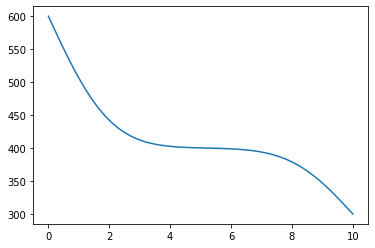

[600,
 590.0018128245831,
 580.043172495454,
 570.1631517837989,
 560.3998848800909,
 550.7901217541776,
 541.3688101408673,
 532.1687131310684,
 523.2200693540495,
 514.5503015632084,
 506.18377812779136,
 498.1416305322097,
 490.4416285409368,
 483.09811324838347,
 476.1219868456959,
 469.5207566423678,
 463.2986297169317,
 457.4566535682542,
 451.99289732018167,
 446.90266741257534,
 442.17875129821647,
 437.8116824568885,
 433.79002002710973,
 430.1006365280673,
 426.7290074794524,
 423.6594972011526,
 420.8756356612892,
 418.36038191148,
 416.0963703737755,
 414.06613699657,
 412.25232305090094,
 410.6378550705547,
 409.2061001291653,
 407.94099627864233,
 406.8271585332567,
 405.8499612639812,
 404.9955982634193,
 404.25112205157063,
 403.6044642186039,
 403.04443874722625,
 402.5607303307869,
 402.14386971220176,
 401.78519802251805,
 401.47682200646636,
 401.21156189589306,
 400.98289354056135,
 400.7848862389976,
 400.61213753864814,
 400.45970610247446,
 400.3230435750822,
 4

In [1]:
import math
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import copy
from scipy.stats import maxwell

start_temp = 400
left_temp = 600
right_temp = 300
length = 10
conductivity = 46
density = 7800
capacity = 460
time = 100000

h = length / 100
tau = time / 100

temps = list()

temps.append(left_temp)
for i in range(99):
    temps.append(start_temp)
temps.append(right_temp)

alpha1 = 0
beta1 = copy.deepcopy(left_temp)
prev_alpha = 0
prev_beta = copy.deepcopy(left_temp)

c_A = conductivity / (h ** 2)
c_B = 2*conductivity/(h ** 2) + density * capacity / tau
c_C = copy.deepcopy(c_A)

for i in range(int(time/tau)):
    alphas = list()
    betas = list()
    c_Fs = list()
    alphas.append(prev_alpha)
    betas.append(prev_beta)
    for j in range(99):
        c_Fs.append(-density * capacity * temps[j + 1] / tau)
        alphas.append(c_A / (c_B - c_C * alphas[j]))
        betas.append((c_C * betas[j] - c_Fs[j]) / (c_B - c_C * alphas[j]))
    for j in range(99):
        temps[99 - j] = alphas[99 - j] * temps[100 - j] + betas[99 - j]
x = list()
x.append(0)
for i in range(99):
    x.append((i+1)*h)
x.append(length)
plt.plot(x, temps)
plt.show()
temps